# Notebook to run experiments to create modified GWO

1. Purpose of: a = 2 - l * ((2) / Max_iter)

    In order to mathematically model approaching the prey we decrease the value of a. Note that the fluctuation range of A is also decreased by a. In other words A is a random value in the interval [-2a, 2a] where a is decreased from 2 to 0 over the course of iterations. The parameter a is decreasedcfrom 2 to 0 in order to emphasize exploration and exploitation, respectively.

2. When random values of A are in [-1, 1], (i.e. |A| < 1 forces the wolves to attack towards the prey --> exploitation

3. In order to mathematically model divergence, we utilize A with random values greater than 1 or less than -1 (i.e A>1 or A<-1  <==>  |A|>1) to oblige the search agent to diverge from the prey. --> exploration.

Therefore, Candidate solutions tend to diverge from the prey when |A| > 1 and converge towards the prey when |A| < 1.

4. Another component of GWO that favors exploration is C. The C vector contains random values in [0, 2]. This component provides random weights for prey in order to stochastically emphasize (C > 1) or deemphasize (C < 1) the effect of prey in defining the distance in Eq. (3.1). Assists GWO to show a more random behavior throughout optimization, favoring exploration and local optima avoidance. C is not linearly decreased in contrast to A. We deliberately require C to provide random values at all times in order to emphasize exploration not only during initial iterations but also final iterations.

In [1]:
import random
import numpy
import math

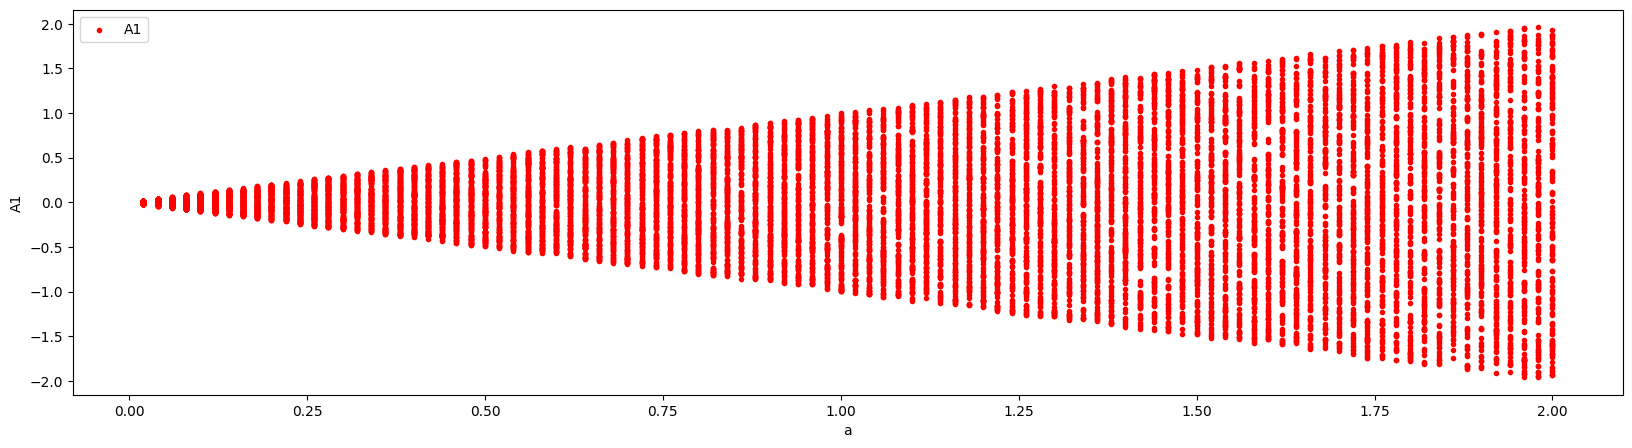

In [100]:
Max_iter= 100
SearchAgents_no= 50
dim=3

a_lst = []
A1_lst = []
C1_lst = []

for l in range(0, Max_iter):

    a = 2 - l * ((2) / Max_iter)

    for i in range(0, SearchAgents_no):
        for j in range(0, dim):

            a_lst.append(a)

            r1 = random.random()  # r1 is a random number in [0,1] 
            r2 = random.random()  # r2 is a random number in [0,1] 

            A1 = 2 * a * r1 - a 
            C1 = 2 * r2

            A1_lst.append(A1)
            C1_lst.append(C1)

#plot a_lst, A1_lst and C1_lst

import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(20, 5))

# scatterplot 
plt.scatter(a_lst, A1_lst, color='r', marker=".")
#plt.scatter(a_lst, C1_lst, color='b', marker=".")

#plt.plot(a_lst, A1_lst, 'r')
#plt.plot(a_lst, C1_lst, 'b')

plt.xlabel('a')
plt.ylabel('A1')

# Add a legend
plt.legend(['A1'])

plt.show()

    

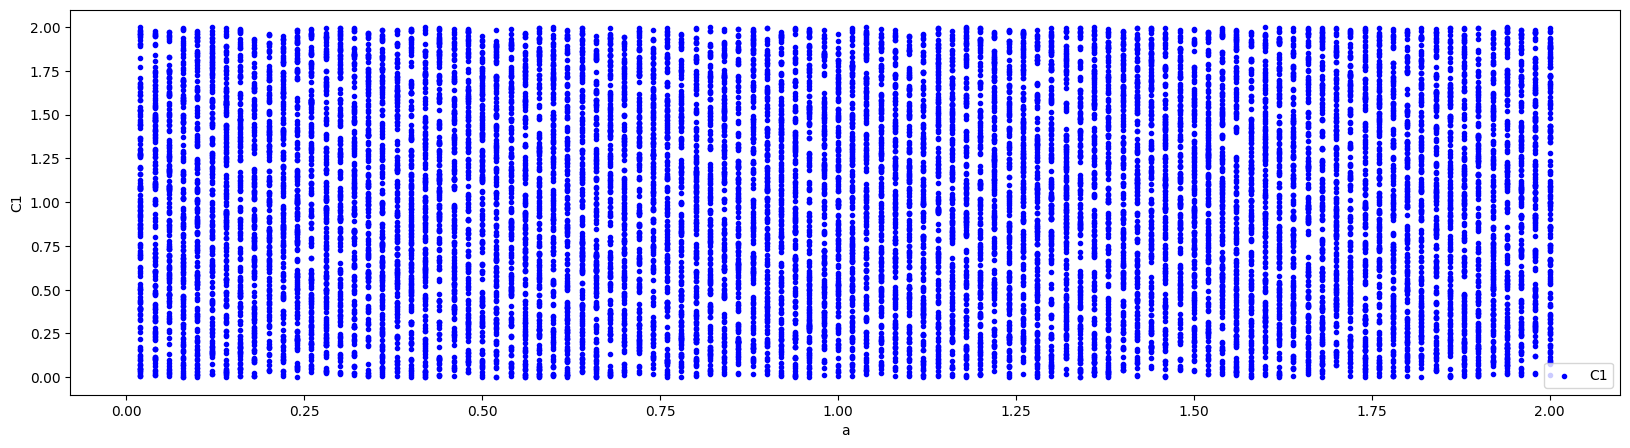

In [12]:
#plot a_lst, A1_lst and C1_lst

import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(20, 5))

plt.scatter(a_lst, C1_lst, color='b', marker=".")
#plt.plot(a_lst, C1_lst, 'b')

plt.xlabel('a')
plt.ylabel('C1')

# Add a legend
plt.legend(['C1'])
plt.show()


# To Emphasize only C>1

need to set random values to >0.5

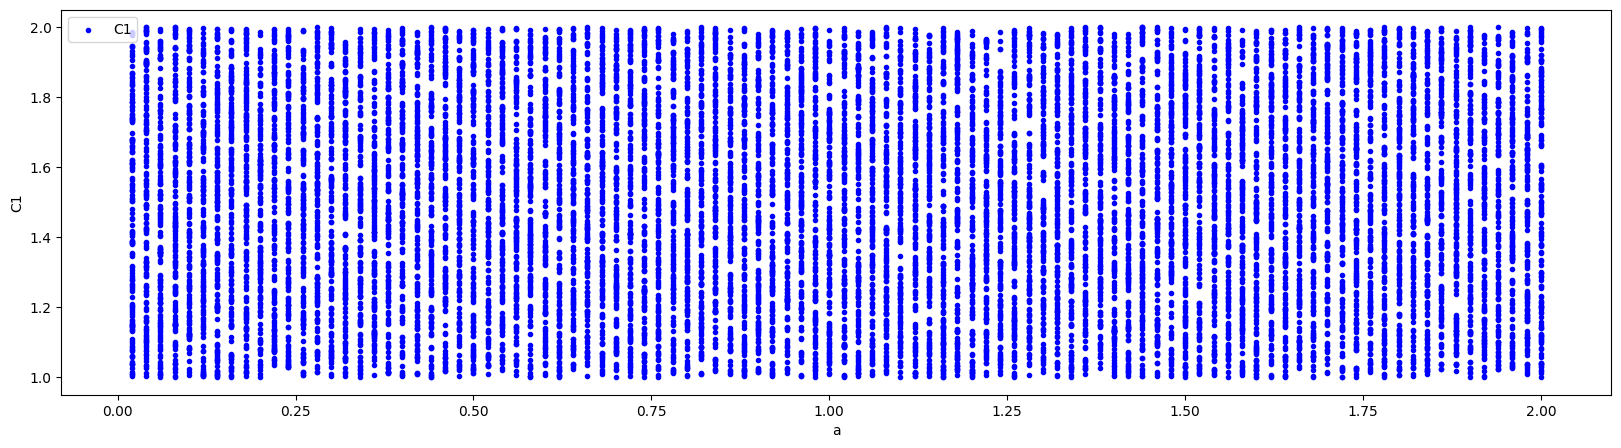

In [16]:
Max_iter= 100
SearchAgents_no= 50
dim=3

a_lst = []
A1_lst = []
C1_lst = []

for l in range(0, Max_iter):

    a = 2 - l * ((2) / Max_iter)

    for i in range(0, SearchAgents_no):
        for j in range(0, dim):

            a_lst.append(a)

            r1 = random.random()  # r1 is a random number in [0,1] 
            r2 = 0.5 + (random.random() * 0.5) # r2 is a random number in [0,1] 

            A1 = 2 * a * r1 - a 
            C1 = 2 * r2

            A1_lst.append(A1)
            C1_lst.append(C1)

import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(20, 5))

plt.scatter(a_lst, C1_lst, color='b', marker=".")
#plt.plot(a_lst, C1_lst, 'b')

plt.xlabel('a')
plt.ylabel('C1')

# Add a legend
plt.legend(['C1'])
plt.show()

# To De-emphasize only C<1

need to set random values to <0.5

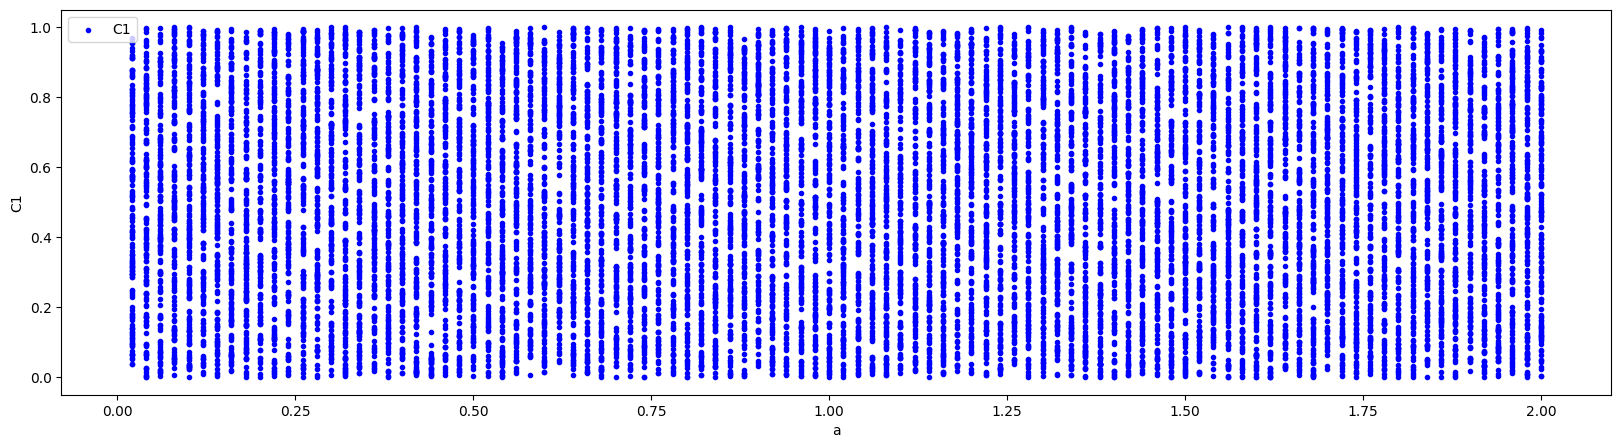

In [17]:
Max_iter= 100
SearchAgents_no= 50
dim=3

a_lst = []
A1_lst = []
C1_lst = []

for l in range(0, Max_iter):

    a = 2 - l * ((2) / Max_iter)

    for i in range(0, SearchAgents_no):
        for j in range(0, dim):

            a_lst.append(a)

            r1 = random.random()  # r1 is a random number in [0,1] 
            r2 = random.random() * 0.5 # r2 is a random number in [0,1] 

            A1 = 2 * a * r1 - a 
            C1 = 2 * r2

            A1_lst.append(A1)
            C1_lst.append(C1)

import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(20, 5))

plt.scatter(a_lst, C1_lst, color='b', marker=".")
#plt.plot(a_lst, C1_lst, 'b')

plt.xlabel('a')
plt.ylabel('C1')

# Add a legend
plt.legend(['C1'])
plt.show()

# Diverge |A|>1 (Exploration)

In [96]:
import random
def generate_random():
    lower= 0.25 #0.25 # 0.05 (guarantees exploration when a>1 but narrows down the range of A)
    upper= 0.75 #0.75 #0.95 (guarantees exploration when a>1 but narrows down the range of A)
    if random.random() < 0.5:
        # Generate a number less than 0.25
        return random.random() * lower # 0.25
    else:
        # Generate a number greater than 0.75
        return upper + (random.random() * lower) # 0.75 and 0.25

# Generate a random value
r2 = generate_random()
print(r2)

0.9844926234834173


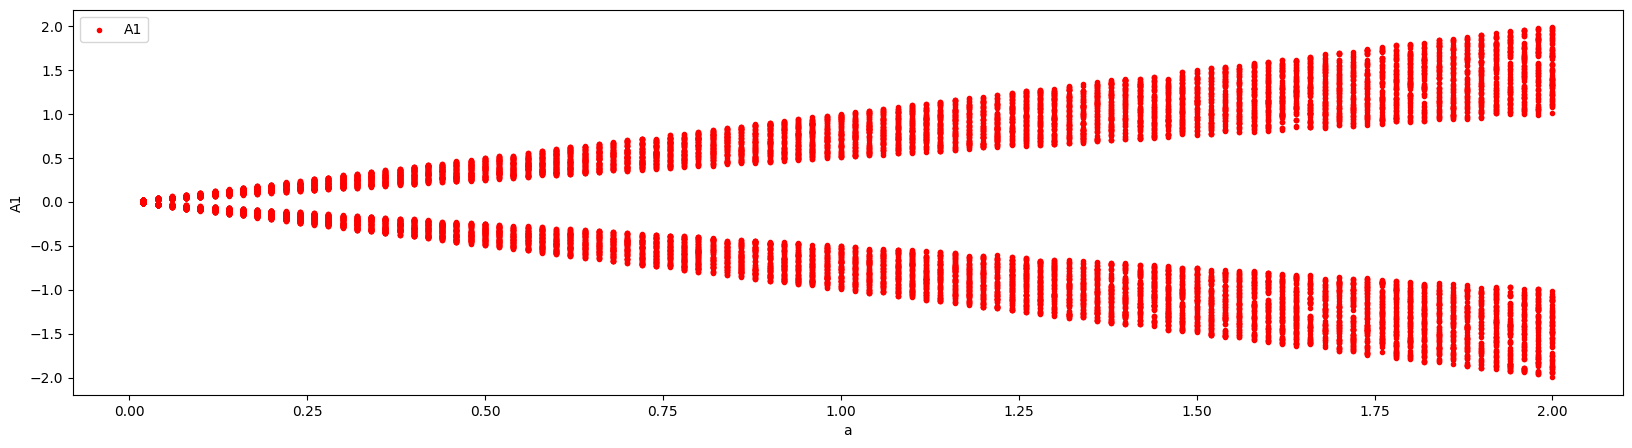

In [97]:
Max_iter= 100
SearchAgents_no= 50
dim=3

a_lst = []
A1_lst = []
C1_lst = []

for l in range(0, Max_iter):

    a = 2 - l * ((2) / Max_iter)

    for i in range(0, SearchAgents_no):
        for j in range(0, dim):

            a_lst.append(a)

            r1 = generate_random() #0.5 + (random.random() * 0.5) # r1 is a random number in [0,1] 
            r2 = random.random()  # r2 is a random number in [0,1] 

            A1 = 2 * a * r1 - a 
            C1 = 2 * r2

            A1_lst.append(A1)
            C1_lst.append(C1)

#plot a_lst, A1_lst and C1_lst

import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(20, 5))

# scatterplot 
plt.scatter(a_lst, A1_lst, color='r', marker=".")

#plt.plot(a_lst, A1_lst, 'r')
#plt.plot(a_lst, C1_lst, 'b')

plt.xlabel('a')
plt.ylabel('A1')

# Add a legend
plt.legend(['A1'])

plt.show()

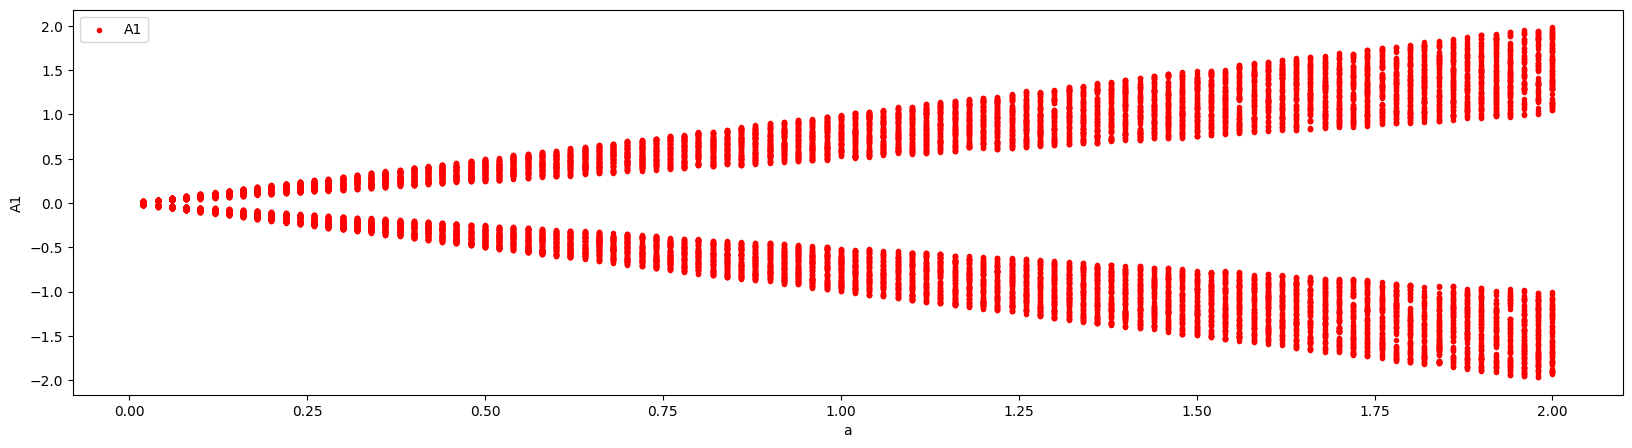

In [98]:
Max_iter= 100
SearchAgents_no= 50
dim=3

a_lst = []
A1_lst = []
C1_lst = []

for l in range(0, Max_iter):

    a = 2 - l * ((2) / Max_iter)

    for i in range(0, SearchAgents_no):
        for j in range(0, dim):

            a_lst.append(a)

            r1 = random.choice([random.uniform(0, 0.25), random.uniform(0.75, 1)]) #0.5 + (random.random() * 0.5) # r1 is a random number in [0,1] 
            r2 = random.random()  # r2 is a random number in [0,1] 

            A1 = 2 * a * r1 - a 
            C1 = 2 * r2

            A1_lst.append(A1)
            C1_lst.append(C1)

#plot a_lst, A1_lst and C1_lst

import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(20, 5))

# scatterplot 
plt.scatter(a_lst, A1_lst, color='r', marker=".")

#plt.plot(a_lst, A1_lst, 'r')
#plt.plot(a_lst, C1_lst, 'b')

plt.xlabel('a')
plt.ylabel('A1')

# Add a legend
plt.legend(['A1'])

plt.show()

# Converge |A| <1 (Exploitation)

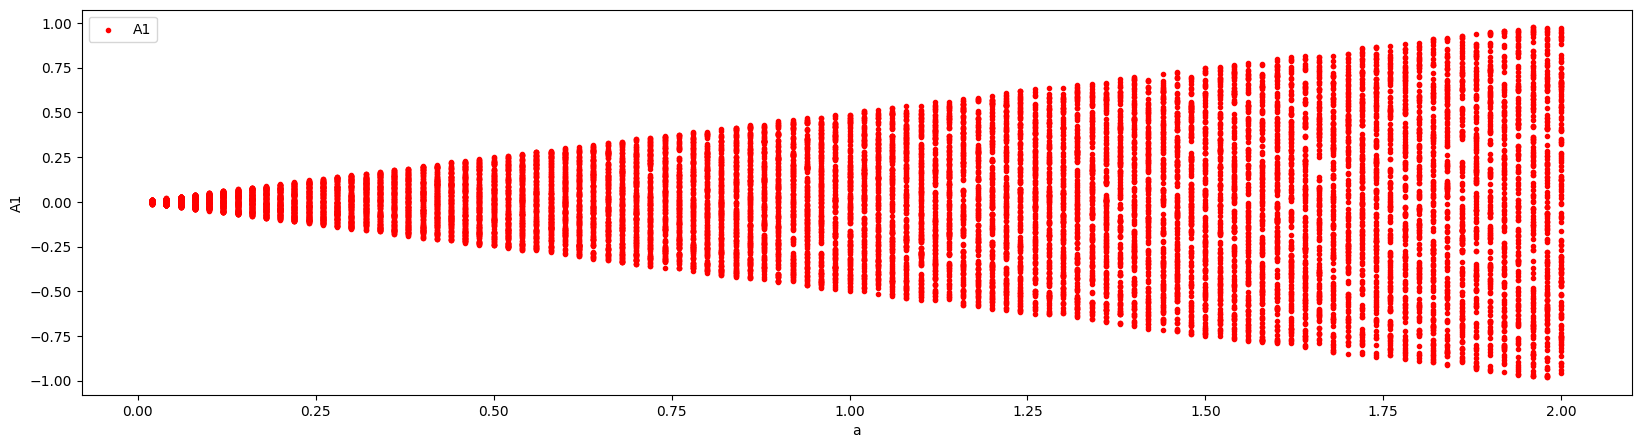

In [32]:
Max_iter= 100
SearchAgents_no= 50
dim=3

a_lst = []
A1_lst = []
C1_lst = []

for l in range(0, Max_iter):

    a = 2 - l * ((2) / Max_iter)

    for i in range(0, SearchAgents_no):
        for j in range(0, dim):

            a_lst.append(a)

            r1 = 0.25 + (random.random() * 0.5) #0.5 + (random.random() * 0.5) # r1 is a random number in [0,1]  # r1 between 0.25 and 0.75
            r2 = random.random()  # r2 is a random number in [0,1] 

            A1 = 2 * a * r1 - a 
            C1 = 2 * r2

            A1_lst.append(A1)
            C1_lst.append(C1)

#plot a_lst, A1_lst and C1_lst

import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(20, 5))

# scatterplot 
plt.scatter(a_lst, A1_lst, color='r', marker=".")

#plt.plot(a_lst, A1_lst, 'r')
#plt.plot(a_lst, C1_lst, 'b')

plt.xlabel('a')
plt.ylabel('A1')

# Add a legend
plt.legend(['A1'])

plt.show()

# Diverge with 1<a<2 (Explore only)

In [58]:
import random

def generate_random():
    lower= 0.05 #0.25
    upper= 0.95 #0.75
    if random.random() < 0.5:
        # Generate a number less than 0.25
        return random.random() * lower # 0.25
    else:
        # Generate a number greater than 0.75
        return upper + (random.random() * lower) # 0.75 and 0.25

# Generate a random value
r2 = generate_random()
print(r2)

0.9714351617690785


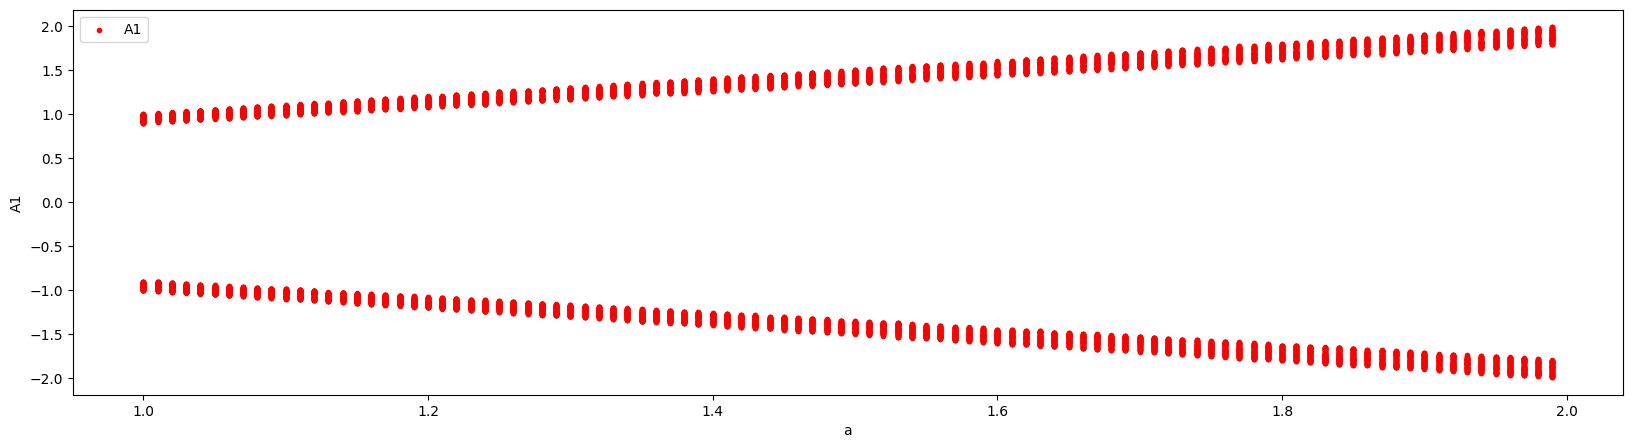

In [60]:
Max_iter= 100
SearchAgents_no= 50
dim=3

a_lst = []
A1_lst = []
C1_lst = []

for l in range(0, Max_iter):

    #a = 2 - l * ((2) / Max_iter)
    a = 1 + l * ((2 - 1) / Max_iter)

    for i in range(0, SearchAgents_no):
        for j in range(0, dim):

            a_lst.append(a)

            r1 = generate_random() #0.5 + (random.random() * 0.5) # r1 is a random number in [0,1] 
            r2 = random.random()  # r2 is a random number in [0,1] 

            A1 = 2 * a * r1 - a 
            C1 = 2 * r2

            A1_lst.append(A1)
            C1_lst.append(C1)

#plot a_lst, A1_lst and C1_lst

import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(20, 5))

# scatterplot 
plt.scatter(a_lst, A1_lst, color='r', marker=".")

#plt.plot(a_lst, A1_lst, 'r')
#plt.plot(a_lst, C1_lst, 'b')

plt.xlabel('a')
plt.ylabel('A1')

# Add a legend
plt.legend(['A1'])

plt.show()

# Converge with 0<a<1 (Exploit Only)

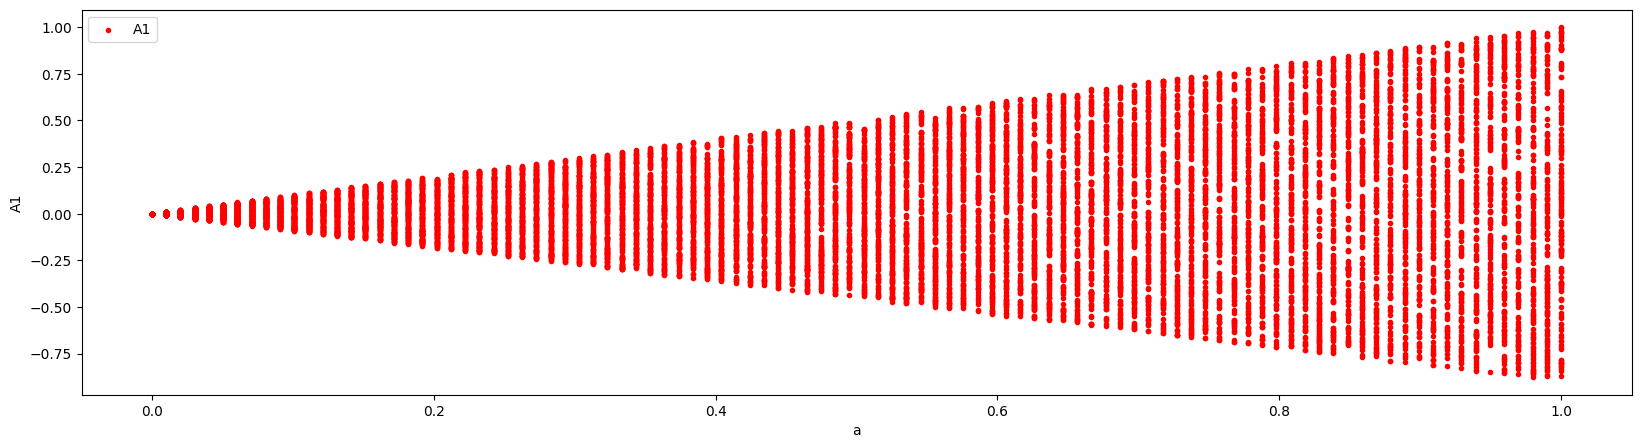

In [61]:
Max_iter= 100
SearchAgents_no= 50
dim=3

a_lst = []
A1_lst = []
C1_lst = []

for l in range(0, Max_iter):

    #a = 2 - l * ((2) / Max_iter)
    a = l * (1 / (Max_iter - 1))  

    for i in range(0, SearchAgents_no):
        for j in range(0, dim):

            a_lst.append(a)

            r1 = 0.05 + (random.random() * 0.95) #0.5 + (random.random() * 0.5) # r1 is a random number in [0,1] 
            r2 = random.random()  # r2 is a random number in [0,1] 

            A1 = 2 * a * r1 - a 
            C1 = 2 * r2

            A1_lst.append(A1)
            C1_lst.append(C1)

#plot a_lst, A1_lst and C1_lst

import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(20, 5))

# scatterplot 
plt.scatter(a_lst, A1_lst, color='r', marker=".")

#plt.plot(a_lst, A1_lst, 'r')
#plt.plot(a_lst, C1_lst, 'b')

plt.xlabel('a')
plt.ylabel('A1')

# Add a legend
plt.legend(['A1'])

plt.show()

# 5 cycles of exploration and then 5 cycles of exploitation

- let "a" reduce from 2 to 0 (since need to reducde step size as we appraoch prey, i.e. need to eventually converge) 
- keep C same for now (c>1 emphasizes the effect of prey on determining the dist moved (towards the prey?)) in eq 3.1)--> D= |C* X_p - X_t|
- Have 5 consecutive iters favoring exploration (|A|>1) using r1< 0.25 or r1> 0.75
- Have 5 consecutive iters favoring exploitation (|A|<1) using 0.25 < r1 <1

In [85]:
l=14 # // is integer division
#(l // 5)  # 0,1,2,3...each repeating 5 times

x= (l // 5) % 2  # odds represent exploration and evens represent exploitation
print(l // 5)

2


In [ ]:
# Explore for 5 iters then exploit for 5 iters, then explore for 5 iters and so on # Base on if it is exp or exploiting change the euqation of a used

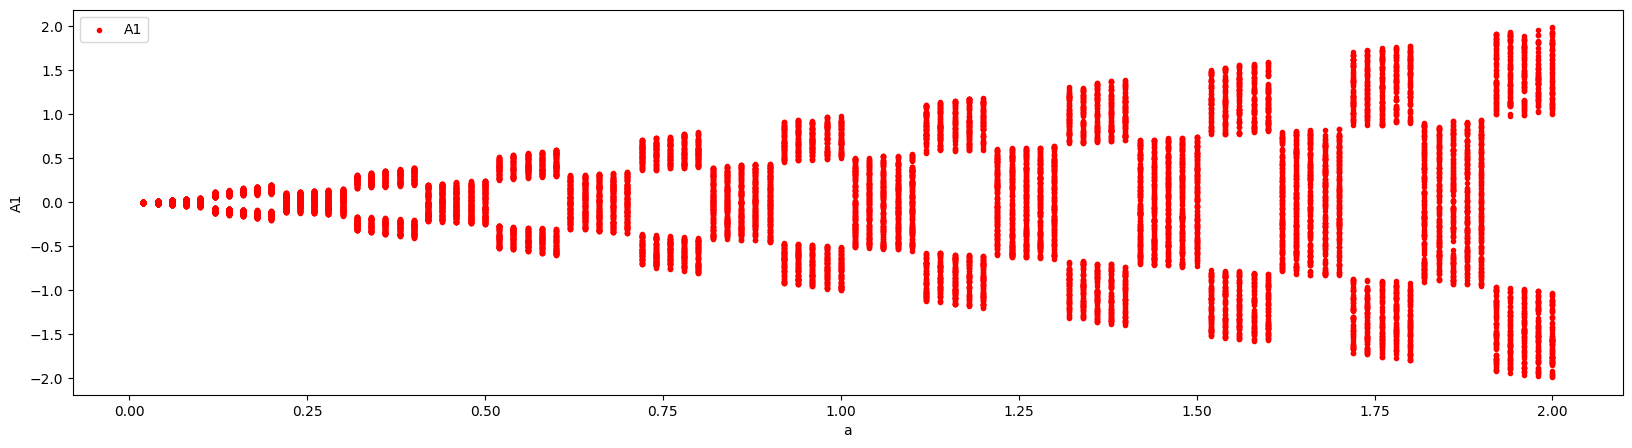

In [101]:
import random
import matplotlib.pyplot as plt

Max_iter = 100
SearchAgents_no = 50
dim = 3
cycles= 5
# Specify upper and lower bounds of random numbers
r_lb= 0.25
r_up= 0.75

a_lst = []
A1_lst = []
C1_lst = []

for l in range(Max_iter):
    a = 2 - l * ((2) / Max_iter)
    for i in range(SearchAgents_no):
        for j in range(dim):
            a_lst.append(a)
            
            # Alternate between exploration and exploitation every 5 iterations
            if (l // cycles) % 2 == 0:
                # Exploration: r1 < 0.25 or r1 > 0.75
                r1 = random.choice([random.uniform(0, r_lb), random.uniform(r_up, 1)])
            else:
                # Exploitation: 0.25 < r1 < 0.75
                r1 = random.uniform(r_lb, r_up)
                
            r2 = random.random()  # r2 is a random number in [0,1]
            
            A1 = 2 * a * r1 - a
            C1 = 2 * r2
            
            A1_lst.append(A1)
            C1_lst.append(C1)

# Plot a_lst, A1_lst, and C1_lst
plt.figure(figsize=(20, 5))
plt.scatter(a_lst, A1_lst, color='r', marker=".")
plt.xlabel('a')
plt.ylabel('A1')
plt.legend(['A1'])
plt.show()